In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [21]:
feature1=pd.read_csv('Area10_100.csv')#第十次循环和第一百次循环的电压差之和
feature2=pd.read_csv('Area100_150.csv')#第十次循环和第一百次循环的电压差之和
label=pd.read_csv('Cycle_life.csv')#三个电池数据集的循环寿命

In [22]:
feature1=feature1.iloc[:,-1]
feature2=feature2.iloc[:,-1]
label=label.iloc[:,-1]

In [23]:
feature1

0      0.002164
1      0.004189
2      0.004242
3      0.011217
4      0.007987
         ...   
119    0.012306
120    0.016484
121    0.014701
122    0.016950
123    0.011296
Name: 0, Length: 124, dtype: float64

In [24]:
feature= pd.concat([feature1, feature2],axis=1)
print(feature)
print(label)

            0         0
0    0.002164  0.008169
1    0.004189  0.008618
2    0.004242  0.008344
3    0.011217  0.010584
4    0.007987  0.009057
..        ...       ...
119  0.012306  0.011697
120  0.016484  0.011517
121  0.014701  0.007465
122  0.016950  0.008597
123  0.011296  0.004812

[124 rows x 2 columns]
0      1852.0
1      2160.0
2      2237.0
3      1434.0
4      1709.0
        ...  
119    1156.0
120     796.0
121     786.0
122     940.0
123    1801.0
Name: 0, Length: 124, dtype: float64


In [25]:

print(feature)
print(label)

            0         0
0    0.002164  0.008169
1    0.004189  0.008618
2    0.004242  0.008344
3    0.011217  0.010584
4    0.007987  0.009057
..        ...       ...
119  0.012306  0.011697
120  0.016484  0.011517
121  0.014701  0.007465
122  0.016950  0.008597
123  0.011296  0.004812

[124 rows x 2 columns]
0      1852.0
1      2160.0
2      2237.0
3      1434.0
4      1709.0
        ...  
119    1156.0
120     796.0
121     786.0
122     940.0
123    1801.0
Name: 0, Length: 124, dtype: float64


In [26]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
def normalization(data):
    scaler = MinMaxScaler()
    data=data.values   # 将pd的系列格式转换为np的数组格式
    data=scaler.fit_transform(np.array(data).reshape(-1,1))  #
    return data


feature1_scale=normalization(feature1)
feature2_scale=normalization(feature2)
label_scale=normalization(label)


In [27]:
feature_scale=np.concatenate([feature1_scale, feature2_scale],axis=1)
print(feature_scale)

[[0.00000000e+00 1.34202845e-02]
 [4.17012922e-03 1.48245771e-02]
 [4.27963509e-03 1.39678830e-02]
 [1.86453846e-02 2.09733842e-02]
 [1.19927196e-02 1.61984209e-02]
 [3.40647960e-02 1.43463474e-02]
 [5.41295909e-02 6.28542823e-02]
 [5.47756931e-02 4.74668205e-02]
 [3.01820021e-02 3.82405114e-02]
 [1.61186234e-02 3.36323169e-02]
 [2.97369987e-02 3.26886702e-02]
 [2.61635107e-02 3.64130253e-02]
 [3.28680570e-02 3.21655016e-02]
 [2.51953473e-02 3.30548723e-02]
 [1.00000000e+00 9.15564074e-02]
 [5.77753601e-02 6.19441144e-02]
 [1.58050120e-01 1.59345521e-01]
 [1.28855427e-01 1.24144205e-01]
 [4.19558217e-02 2.72228980e-02]
 [4.00516513e-02 3.39821215e-02]
 [3.76913807e-02 3.71568493e-02]
 [5.86305626e-02 4.82331445e-02]
 [5.06561936e-02 4.47818522e-02]
 [5.36886558e-02 4.35637354e-02]
 [5.20198405e-02 4.41133896e-02]
 [5.90147834e-02 5.75946709e-02]
 [6.43963622e-02 5.22290256e-02]
 [6.71069488e-02 5.93488915e-02]
 [7.28637907e-02 6.06116382e-02]
 [4.83204601e-02 4.02362288e-02]
 [5.405467

In [95]:
feature

,0,0
0,0.002164,0.008169
1,0.004189,0.008618
2,0.004242,0.008344
3,0.011217,0.010584
4,0.007987,0.009057
...,...,...
119,0.012306,0.011697
120,0.016484,0.011517
121,0.014701,0.007465
122,0.016950,0.008597


In [7]:
label

0      1852.0
1      2160.0
2      2237.0
3      1434.0
4      1709.0
        ...  
119    1156.0
120     796.0
121     786.0
122     940.0
123    1801.0
Name: 0, Length: 124, dtype: float64

In [28]:
print(feature1)
print(label)

0      0.002164
1      0.004189
2      0.004242
3      0.011217
4      0.007987
         ...   
119    0.012306
120    0.016484
121    0.014701
122    0.016950
123    0.011296
Name: 0, Length: 124, dtype: float64
0      1852.0
1      2160.0
2      2237.0
3      1434.0
4      1709.0
        ...  
119    1156.0
120     796.0
121     786.0
122     940.0
123    1801.0
Name: 0, Length: 124, dtype: float64


In [84]:
from sklearn.model_selection import train_test_split
# #F1+F2
X_train2,X_test2=feature_scale[:30,:],feature_scale[30:41,:]
y_train2,y_test2=label_scale[:30],label_scale[30:41]

#F1
X_train,X_test=feature1_scale[:30],feature1_scale[30:41]
y_train,y_test=label_scale[:30],label_scale[30:41]

# #F2
# X_train,X_test=feature2.iloc[:30],feature2.iloc[30:41]
# y_train,y_test=label.iloc[:30],label.iloc[30:41]
# dataset2dataset3
# X_train,X_test=feature_scale[41:100,:],feature_scale[100:,:]
# y_train,y_test=label_scale[41:100],label_scale[100:]


In [59]:
print(X_train.shape)
print(y_train.shape)

(30, 1)
(30, 1)


In [90]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import xgboost as xgb


model1=svm.SVR()
model1.fit(X_train,y_train)
#y_pred=model1.predict(X_test)

lr=LinearRegression().fit(X_train,y_train)
# y_pred=lr.predict(X_test)


xgb = xgb.XGBRegressor()
xgb.fit(X_train2, y_train2)
y_pred=xgb.predict(X_test)




E:\Anancanda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Feature shape mismatch, expected: 2, got 1

In [106]:
y_pred_page1=model1.predict(feature1_scale[30:41])
#y_pred_page2=model1.predict(feature2_scale[30:41])
y_pred_page3=lr.predict(feature1_scale[30:41])
y_pred_page4=xgb.predict(feature_scale[30:41])
y_test_page=label_scale[30:41]
print(label_scale[30:41])
print(y_test_page.shape)
print(y_pred_page2.shape)

[[0.26567736]
 [0.26615606]
 [0.23934897]
 [0.22450933]
 [0.22833892]
 [0.39157492]
 [0.43226424]
 [0.26519866]
 [0.24078506]
 [0.22403064]
 [0.21589277]]
(11, 1)
(11,)


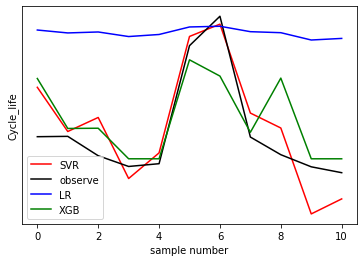

In [111]:
# x=np.arange(len(y_pred_page1))
# plt.scatter(x,y_pred_page1,c='r',label='SVR')
# #plt.plot(x,y_pred_page2,c='y',label='SVR2')#,linestyle='- '
# plt.scatter(x,y_test_page,c='k',label='observe')
# plt.scatter(x,y_pred_page3,c='b',label='LR')
# plt.scatter(x,y_pred_page4,c='g',label='XGB')
# # plt.title("。。。。")
# plt.xlabel("sample number")
# plt.ylabel("Cycle_life")
# plt.yticks([])
# plt.legend()
# # plt.text(30,0.06, r'ρ=-0.78', fontsize=12)
# # plt.colorbar()
# plt.savefig( 'Cycle life prediction using diffrent methods scatter.png')


x=np.arange(len(y_pred_page1))
plt.plot(x,y_pred_page1,c='r',label='SVR')
#plt.plot(x,y_pred_page2,c='y',label='SVR2')#,linestyle='- '
plt.plot(x,y_test_page,c='k',label='observe')
plt.plot(x,y_pred_page3,c='b',label='LR')
plt.plot(x,y_pred_page4,c='g',label='XGB')
# plt.title("。。。。")
plt.xlabel("sample number")
plt.ylabel("Cycle_life")
plt.yticks([])
plt.legend()
# plt.text(30,0.06, r'ρ=-0.78', fontsize=12)
# plt.colorbar()
plt.savefig( 'Cycle life prediction using diffrent methods plot.png')

In [100]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


def evaluation(y_test, y_predict):
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = sqrt(mean_squared_error(y_test, y_predict))
    return mae, rmse

mae,rmse=evaluation(y_test, y_pred)
print('mae:{},rmse:{}'.format(mae,rmse))

mae:0.06726115099394243,rmse:0.08577031266558778


In [ ]:
# 分开归一化
# LR
# mae:0.1508326005364663,rmse:0.270294857699023F1
# mae:0.23126234227880718,rmse:0.2801090391925503F2
# SVR
# mae:0.23913681662920724,rmse:0.2937111651967422F1
# mae:0.11299691125253516,rmse:0.16250202760649674F2
# mae:0.1869306596774142,rmse:0.2225996692858093F1+F2
# XGB
# mae:0.12875475873683642,rmse:0.1972147421982882

# dataset2+3
# LR
# mae:mae:0.15495524939748181,rmse:0.2226333766263237F1
# mae:0.15898299576206953,rmse:0.22808321986857444
# SVR
# mae:0.17679303735183272,rmse:0.22686753177901534F1
# mae:0.14850697975071644,rmse:0.18664264739923803F2
# mae:0.19689973716252882,rmse:0.23512937221407415F1+F2
# XGB
# mae:0.14075410227854823,rmse:0.20011201934539694

In [ ]:
#取对数
# 线性回归模型:
# mae:0.08575466092804905,rmse:0.09938170907406266
# SVR模型:
# mae:0.10048895463910852,rmse:0.14430292194504338


# 归一化
# 线性模型：
# mae:0.14554254643808506,rmse:0.15959797490667044
#100-150：mae:0.17576245618656097,rmse:0.35135613328270143
# SVR模型:
# 10-100：mae:0.05551163344347185,rmse:0.10401392864832236
#100-150：mae:0.10294093245641811,rmse:0.1406126182119327
#使用两个特征的结果 mae:0.07528818796971945,rmse:0.1334187348245085
#SVR对异常值比较敏感
# XGB模型：
#mae:0.04316952009208106,rmse:0.056111260204743885,两个特征都用

# 使用后面的83个电池cell，42-100/100-124,
# XGBmae:0.09023486577076634,rmse:0.12952956179057631两个特征
# SVR:F1:mae:0.10201942865753706,rmse:0.13481411070914512
#     F2:mae:0.09515422435517999,rmse:0.12491692271671737
#     mae:0.15495524939748181,rmse:0.2226333766263237
# LR:F1:mae:0.1658823916925556,rmse:0.2167357628726603
#    F2:mae:mae:0.15396125125448012,rmse:0.20766568294709048